# Global Food Analytics: Empowering Consumers and Better Understanding of Food Nutrition

**Group Member: ** Yuqing Lin, Yitian Hou, Shiyi Lin, Xiyu Wu

The project aims to analyze global food product data for nutritional quality across dimensions (such as country, organic vs non organic) and health insights, utilizing the Open Food Facts database.

The goal is to develop a comprehensive predictive and exploratory model that aids consumers in making informed decisions regarding food nutrition and safety.

We will explore a variety of ML models, including regression and classification models. Advanced techniques such as neural networks and deep learning may also be considered for complex pattern recognition tasks.

## Import the required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from collections import Counter
from PIL import Image
from skimage import io, transform
import os
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from google.colab import drive
import json
import glob

In [ ]:
%%capture
!apt update
!pip install kaggle

# **Part I:** Data Loading and Preprocessing

## **1.1** Data Loading and Preprocessing

We are using the csv file from Open Food Facts database. (https://www.kaggle.com/datasets/openfoodfacts/world-food-facts/data)

To get the data in here:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive, 'MyDrive' (Please **DO NOT** upload the json file into any _specific_ folder!).


### **1.1.1** Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:

# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d openfoodfacts/world-food-facts

['Downloading world-food-facts.zip to /content',
 '',
 '  0% 0.00/109M [00:00<?, ?B/s]',
 ' 13% 14.0M/109M [00:00<00:00, 146MB/s]',
 ' 30% 33.0M/109M [00:00<00:00, 98.7MB/s]',
 ' 45% 49.0M/109M [00:00<00:00, 93.6MB/s]',
 ' 54% 59.0M/109M [00:00<00:00, 91.6MB/s]',
 ' 73% 79.0M/109M [00:00<00:00, 121MB/s] ',
 ' 86% 93.0M/109M [00:00<00:00, 127MB/s]',
 ' 97% 106M/109M [00:00<00:00, 122MB/s] ',
 '',
 '100% 109M/109M [00:00<00:00, 115MB/s]']

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/world-food-facts.zip

Archive:  /content/world-food-facts.zip
  inflating: en.openfoodfacts.org.products.tsv  


In [ ]:
# Read the csv file and save it to a dataframe called "df_foodfacts"
df_foodfacts = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

<ipython-input-8-ec0f0e325c95>:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_foodfacts = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')


Review the first 5 rows

In [ ]:
df_foodfacts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **1.1.2** Check Nulls and Duplicates

We will find the number of rows with null values and the number of duplicated rows.

Store the results into `num_nulls` and `num_dups`, respectively.


In [ ]:
# find number of rows with null values
num_nulls = df_foodfacts.isnull().any(axis = 1).sum()
print(num_nulls)
print(len(df_foodfacts))

356027
356027


The number of total rows is equal to the number or rows with null values. It implies that all rows have null values in certain columns. Then calculate the number of rows with null values for each column.

In [ ]:
# calculate the number of nulls in each column
pd.options.display.max_rows=200 # increase max rows displayed

null_counts = df_foodfacts.isnull().sum().sort_values(ascending=True)
print(null_counts)

last_modified_t                                    0
last_modified_datetime                             0
creator                                            3
created_t                                          3
created_datetime                                  10
code                                              26
url                                               26
states                                            52
states_en                                         52
states_tags                                       52
countries_en                                     275
countries_tags                                   275
countries                                        275
product_name                                   17512
brands                                         29050
brands_tags                                    29070
energy_100g                                    60660
proteins_100g                                  61866
salt_100g                                     

As a next step, remove the columns with all rows with null values. We dropped 16 columns.

In [ ]:
# Remove columns where all values are null
df_foodfacts = df_foodfacts.dropna(axis=1, how='all')

# Print the shape of the new DataFrame to see the result
print("New DataFrame shape:", df_foodfacts.shape)

New DataFrame shape: (356027, 147)


In [ ]:
# find number of duplicated rows
num_dups = df_foodfacts.duplicated().sum()
print(num_dups)

0




### **1.1.3** Data Cleaning

Visualize the columns with missing / null values

In [ ]:
def msv1(data, thresh=20, color_above='#ffcccb', color_below='#90ee90', width=18, height=10, bar_width=0.75):
    plt.figure(figsize=(width, height))
    percentage = (data.isnull().mean()) * 100
    sorted_series = percentage.sort_values(ascending=False)
    above_thresh = sorted_series > thresh
    colors = np.where(above_thresh, color_above, color_below)

    plt.text(len(sorted_series) - 1, thresh + 5, 'Threshold for missing values (%s%%)' % thresh, fontsize=16, color='red', ha='right')
    sorted_series.plot.bar(color=colors, width=bar_width, edgecolor=None)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing Values Percentage per Column', fontsize=20 )

    plt.xlabel('Columns', size=15)
    plt.ylabel('Missing Values Percentage', size=15)
    plt.xticks(rotation=90, weight='normal')
    plt.yticks(weight='normal')
    plt.tight_layout()

    return plt.show()

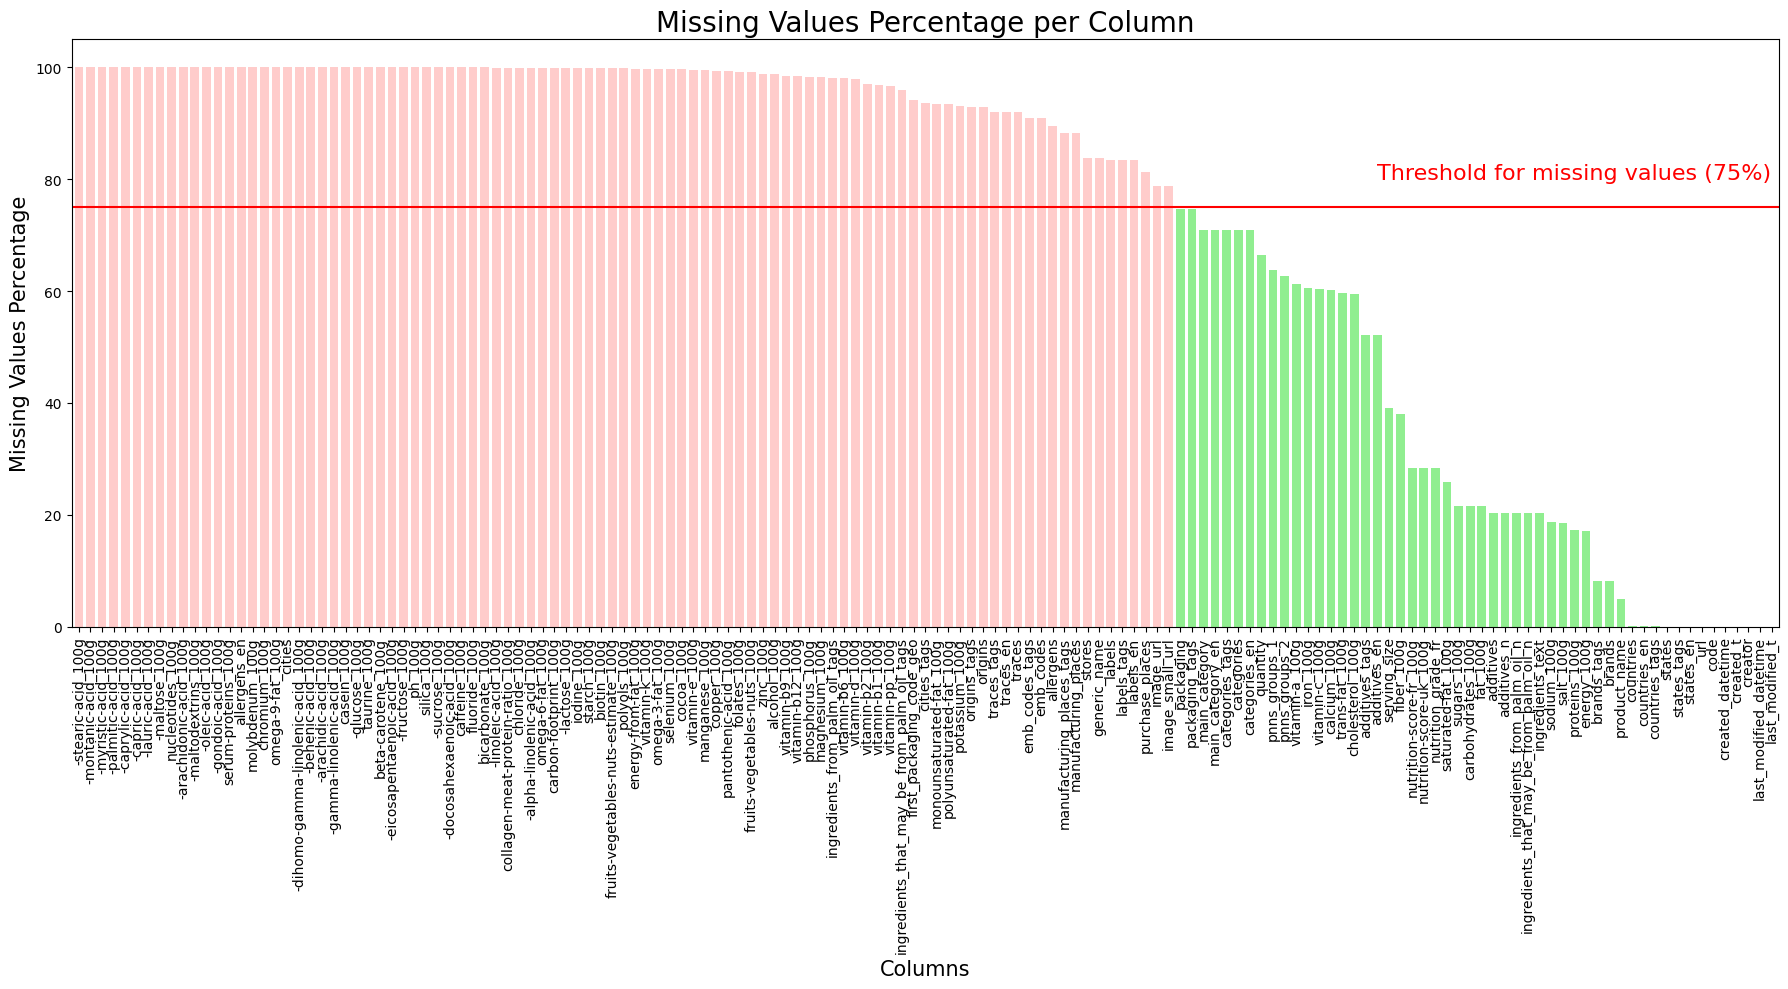

In [ ]:
# Call the function with the desired threshold and colors
msv1(df_foodfacts, 75, color_above='#ffcccb', color_below='#90ee90')

Excluding all missing columns with more than 75% missing values to avoid misleading results

In [ ]:
df_foodfacts_cleaned=df_foodfacts.dropna(thresh=0.25*len(df_foodfacts), axis=1)
print(f"Data shape before cleaning {df_foodfacts.shape}")
print(f"Data shape after cleaning {df_foodfacts_cleaned.shape}")
print(f"We dropped {df_foodfacts.shape[1]- df_foodfacts_cleaned.shape[1]} columns")

Data shape before cleaning (356027, 147)
Data shape after cleaning (356027, 52)
We dropped 95 columns


In [ ]:
#remove columns we are not interested in (like code, url, etc)
df_foodfacts_cleaned = df_foodfacts_cleaned[['product_name', 'packaging_tags', 'brands_tags', 'categories_en', 'countries_en', 'ingredients_text',
                                             'serving_size', 'additives_en', 'ingredients_from_palm_oil_n',
                                             'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
                                             'states_en', 'main_category_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
                                             'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                                             'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g']]
print(f"Data shape after cleaning {df_foodfacts_cleaned.shape}")

Data shape after cleaning (356027, 31)


# **Part II:** EDA & Feature Engineering

We use Exploratory Data Analysis (EDA) approach to analyzing data sets to summarize their main characteristics. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


## **2.1** EDA

### **2.1.1** Understanding Data

First of all, we need to understand the data, through descriptive statistics, datatypes, or just a quick tabular visualization.

In [ ]:
# Display the datatypes in `df_foodfacts`
df_foodfacts_cleaned.dtypes

product_name                                object
packaging_tags                              object
brands_tags                                 object
categories_en                               object
countries_en                                object
ingredients_text                            object
serving_size                                object
additives_en                                object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
states_en                                   object
main_category_en                            object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
trans-fat_100g                             float64
cholesterol_100g               

In [ ]:
# Display the descriptive statistics of `df_reservations`
df_foodfacts_cleaned.describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,283867.000000,283867.000000,295367.000000,2.794970e+05,263823.000000,143443.000000,144170.000000,2.792200e+05,279186.000000,2.206830e+05,2.941610e+05,289739.000000,289694.000000,137706.000000,141060.000000,141517.000000,140660.000000,254856.000000
mean,0.023430,0.059736,1125.453320,5.606587e+04,5.092460,0.073487,0.020065,5.614020e+04,15.673428,3.843467e+05,5.326598e+04,1.941281,0.764401,0.000398,0.023394,0.127284,0.003791,9.166137
std,0.153094,0.280660,936.825952,2.963385e+07,7.965148,1.539417,0.357963,2.964854e+07,21.983635,1.805529e+08,2.888578e+07,120.545973,47.462729,0.073239,2.234928,3.349236,0.216565,8.999870
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000e+00,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000
25%,0.000000,0.000000,382.000000,1.000000e-01,0.000000,0.000000,0.000000,5.600000e+00,1.200000,0.000000e+00,7.200000e-01,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1092.000000,5.290000e+00,1.790000,0.000000,0.000000,2.000000e+01,5.400000,1.500000e+00,4.880000e+00,0.558800,0.220000,0.000000,0.000000,0.036000,0.001010,10.000000
75%,0.000000,0.000000,1674.000000,2.000000e+01,7.140000,0.000000,0.020000,5.758000e+01,23.330000,3.600000e+00,1.000000e+01,1.356360,0.534000,0.000107,0.003800,0.107000,0.002400,16.000000
max,2.000000,6.000000,231199.000000,1.566667e+10,550.000000,369.000000,95.238000,1.566667e+10,3520.000000,8.481815e+10,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000


In [ ]:
df_foodfacts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             338515 non-null  object 
 1   packaging_tags                           89959 non-null   object 
 2   brands_tags                              326957 non-null  object 
 3   categories_en                            103301 non-null  object 
 4   countries_en                             355752 non-null  object 
 5   ingredients_text                         283893 non-null  object 
 6   serving_size                             216621 non-null  object 
 7   additives_en                             170189 non-null  object 
 8   ingredients_from_palm_oil_n              283867 non-null  float64
 9   ingredients_that_may_be_from_palm_oil_n  283867 non-null  float64
 10  nutrition_grade_fr              

In [ ]:
print(df_foodfacts_cleaned.columns.tolist())

['product_name', 'packaging_tags', 'brands_tags', 'categories_en', 'countries_en', 'ingredients_text', 'serving_size', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states_en', 'main_category_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g']


### **2.1.2** Data Visualization

As a second step, we will use data visualization approach to detect some trends, characteristics, fun facts about open food data. Through some key questions and visualization to demonstrate the answer to those questions, we have a better undersatanding of data distribution and key attributes accordingly.  


#### (a) Which country has the most number of products in this dataset?

In [ ]:
# Assuming df_foodfacts is your main dataframe and 'countries_en' is the column with country data
countries_count = df_foodfacts_cleaned['countries_en'].value_counts().head(10).rename_axis('country').reset_index(name='count')

# Display the DataFrame with a background gradient
result = countries_count.style.background_gradient(cmap='Greens')
result

,country,count
0,United States,173159
1,France,123961
2,Switzerland,14932
3,Germany,8470
4,Spain,5529
5,United Kingdom,5092
6,Belgium,2936
7,Australia,2201
8,Russia,1582
9,"France,Switzerland",1492


**Conclusion**
Through the table above, we find that developed countries tend to have larger number of food entries. United States has the largest number of food entries, it implies either the country has more food in reality or volunteers / developers in the United States tend to upload food entries more often.

#### (b) Top 10 Most Common Additives

<ipython-input-23-2986699e45c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=additives_series.index[:10], x=additives_series.values[:10], palette='viridis')


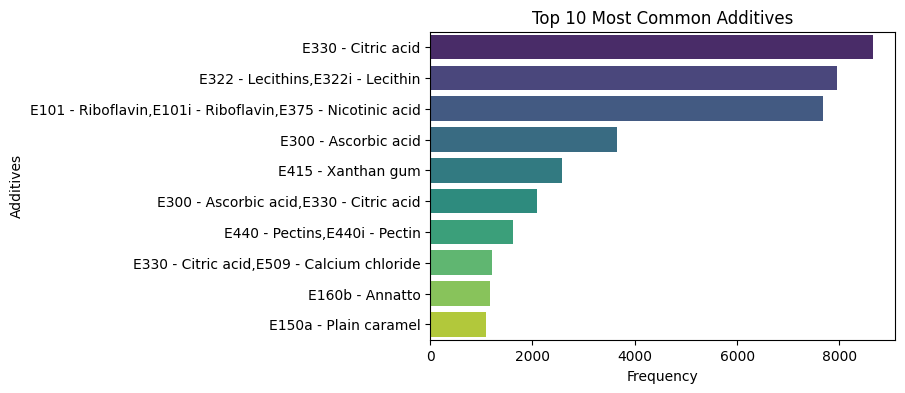

In [ ]:
additives_series = df_foodfacts_cleaned['additives_en'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(y=additives_series.index[:10], x=additives_series.values[:10], palette='viridis')
plt.title('Top 10 Most Common Additives')
plt.xlabel('Frequency')
plt.ylabel('Additives')
plt.show()

**Conclusion**

Through the bar plot above, we find out the top 10 most common used additives globally. Citric Acid is the most common additive. Based on common sense, we know that citric acid is widely used as a flavor enhancer in foods and beverages. The second common additive is lecthin, which is also used as an emulsifier in food products, helping stabilize mixtures of oil and water.

#### (c) Top 10 Main Categories

<ipython-input-24-7bee612b26aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=main_category_series.index[:10], x=main_category_series.values[:10], palette='viridis')


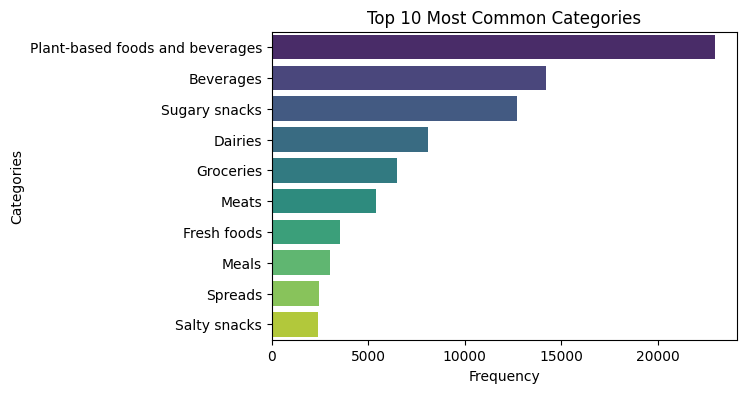

In [ ]:
main_category_series = df_foodfacts_cleaned['main_category_en'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(y=main_category_series.index[:10], x=main_category_series.values[:10], palette='viridis')
plt.title('Top 10 Most Common Categories')
plt.xlabel('Frequency')
plt.ylabel('Categories')
plt.show()

#### (d) Average Nutrition Score by Country

In order to present maps of nutritional quality in different countries and regions and to identify correlations between geographic location and nutritional quality of food products

In [ ]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 39.1 MB/s eta 0:00:00


In [ ]:
pip install adjustText

In [ ]:
# remove the rows without 'nutrition-score-fr_100g'
df_foodfacts_nutri = df_foodfacts_cleaned.dropna(axis=0, subset=['nutrition-score-fr_100g'])

# Group by 'countries_en' and calculate count and mean for 'nutrition-score-fr_100g'
country_aggregates = df_foodfacts_nutri.groupby('countries_en').agg(
    count=('nutrition-score-fr_100g', 'count'),
    average_nutrition_score=('nutrition-score-fr_100g', 'mean')
).reset_index()

# Rename columns to better represent the data
country_aggregates.rename(columns={'countries_en': 'country'}, inplace=True)

# sort by average nutrition score
country_aggregates = country_aggregates.sort_values(by='average_nutrition_score', ascending=True)

# remove the countries with less than 30 rows
country_aggregates = country_aggregates[country_aggregates['count'] >= 30]

# Display the resulting DataFrame
print(country_aggregates)

                        country   count  average_nutrition_score
525                       Spain    2564                 5.507020
280        France,French Guiana      43                 5.651163
478                      Mexico      92                 6.065217
41                      Austria      80                 6.800000
395       France,fr:Deutschland      35                 7.028571
489                      Norway      43                 7.139535
309           France,Guadeloupe      83                 7.313253
451                     Ireland      40                 7.325000
532                      Sweden     251                 7.529880
438                   Hong Kong      31                 7.806452
488                 New Zealand      63                 7.920635
23                    Australia     496                 7.925403
548              United Kingdom    1524                 7.973753
188                      Canada     194                 7.994845
499                    Po

In [ ]:
!pip install geopandas

<ipython-input-29-814b1e3f129b>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-29-814b1e3f129b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_nutrition['country'] = country_nutrition['country'].replace(name_mapping)


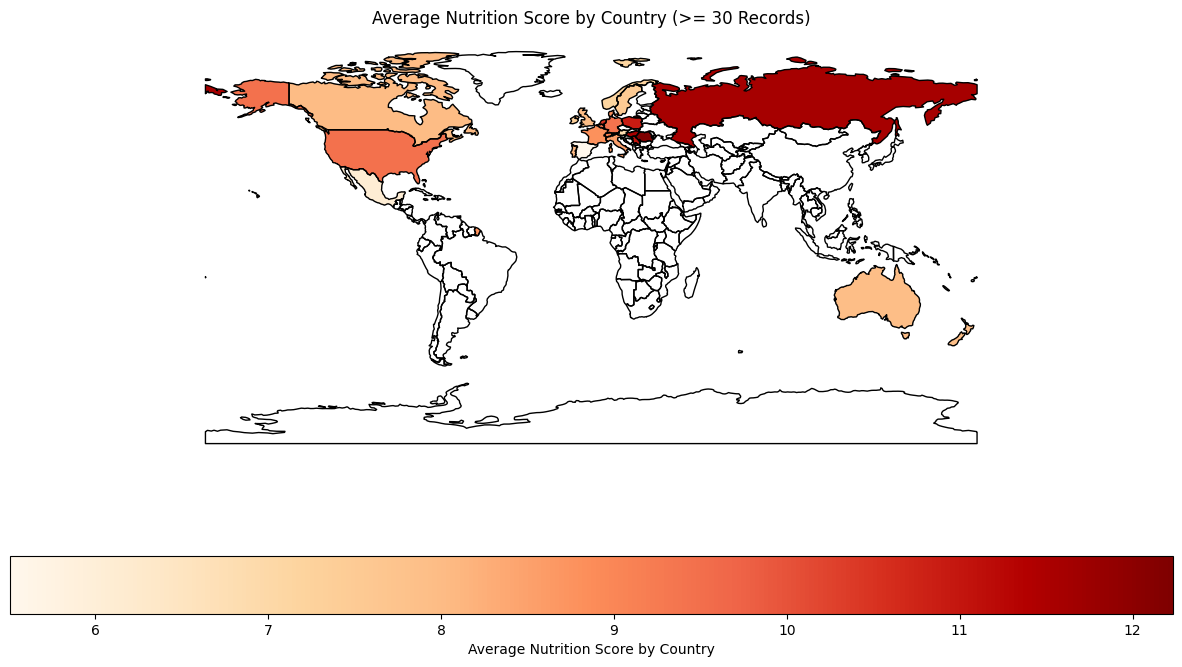

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare country_nutrition DataFrame
country_nutrition = country_aggregates[['country', 'average_nutrition_score']]

# Apply the name mapping to standardize country names if needed
name_mapping = {
    'United States': 'United States of America',
}
country_nutrition['country'] = country_nutrition['country'].replace(name_mapping)

# Merge the country names with the world map data
merged = world.merge(country_nutrition, how='left', left_on='name', right_on='country')

# Adjust the aspect ratio of the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))  # Adjust figsize for aspect ratio

# Plot the world map with country outlines
world.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the countries with average nutrition score data
merged.dropna().plot(column='average_nutrition_score', ax=ax, legend=True,
                     legend_kwds={'label': "Average Nutrition Score by Country",
                                  'orientation': "horizontal"}, cmap='OrRd',
                     edgecolor='black', linewidth=0.1)  # Thin black line for country borders

# Set alpha to 0.6 for the patches with data
for patch in [p for p in ax.patches if p.get_facecolor() != (1, 1, 1, 1)]:  # Check for non-white patches
    patch.set_alpha(0.6)

# Turn off axis for a cleaner map
ax.set_axis_off()

# Set title
ax.set_title('Average Nutrition Score by Country (>= 30 Records)', fontsize=12)

plt.show()

**Conclusion**

We find Eastern Europe, including Romania, Russia, Hungray, Poland tend to have food that have higher nutrition scores. Western Europe, Nordic Europe and Asia, for example, Spain, Austria, Sweden, Norway and Hong Kong tend to have food that have lower nutrition scores.  

#### (e) Average Nurition Score by Food Category

In [ ]:
# Group by 'countries_en' and calculate count and mean for 'nutrition-score-fr_100g'
category_aggregates = df_foodfacts_nutri.groupby('main_category_en').agg(
    count=('nutrition-score-fr_100g', 'count'),
    average_nutrition_score=('nutrition-score-fr_100g', 'mean')
).reset_index()

# Rename columns to better represent the data
category_aggregates.rename(columns={'main_category_en': 'main_category'}, inplace=True)

# sort by average nutrition score
category_aggregates = category_aggregates.sort_values(by='average_nutrition_score', ascending=True)

# remove the categories with less than 50 rows
category_aggregates = category_aggregates[category_aggregates['count'] >= 50]

# Display the resulting DataFrame
print(category_aggregates)

                       main_category  count  average_nutrition_score
241                 Farming products    202                -0.549505
18                        Baby foods    501                 1.634731
632                        Tabbouleh     88                 1.761364
497                          Pickles    201                 1.890547
505  Plant-based foods and beverages  17477                 1.951594
82                      Canned foods   1484                 3.287062
424                            Meals   2620                 3.533969
122                  Chips and fries     51                 3.588235
269                     Frozen foods   1567                 3.997447
293                     Fruit juices   1920                 4.082292
659                         Vinegars    120                 4.475000
216              Dietary supplements    169                 5.958580
581                          Seafood   1251                 6.021583
204                          Dairi

<ipython-input-31-0cc6cd8a1655>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_aggregates.drop("count", axis=1), x='main_category', y='average_nutrition_score', palette='husl')


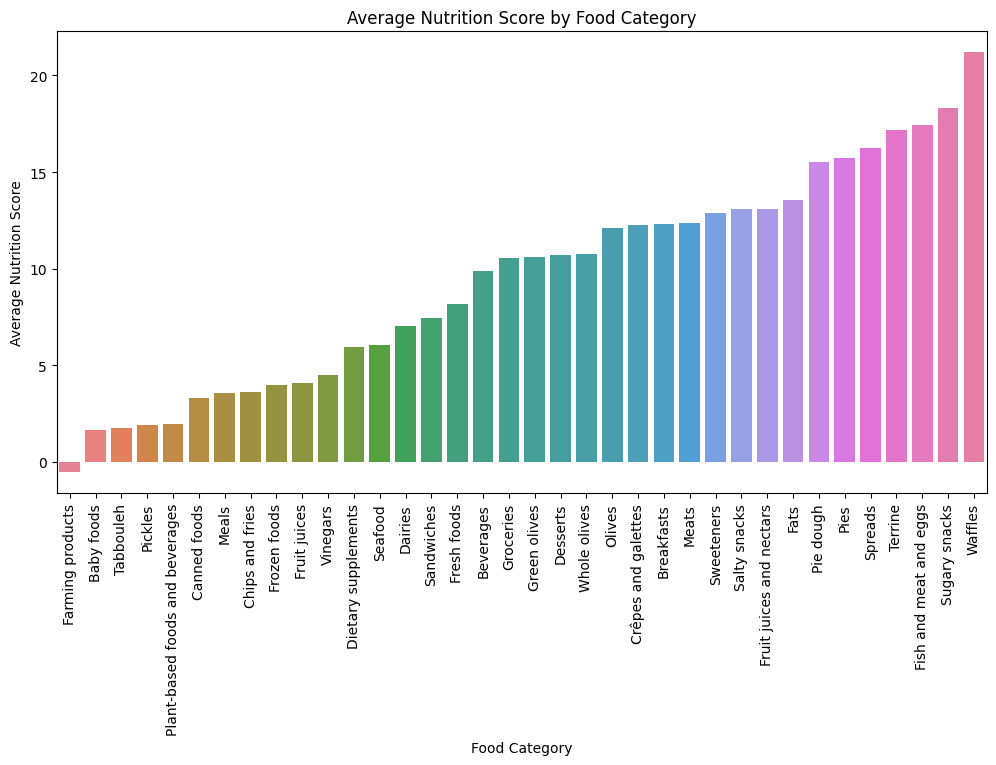

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(data=category_aggregates.drop("count", axis=1), x='main_category', y='average_nutrition_score', palette='husl')

# Set title and axis labels
plt.title('Average Nutrition Score by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Average Nutrition Score')
plt.xticks(rotation=90, weight='normal')

plt.show()

**Conclusion**
Through the bar plot above, sugary snacks, waffles, fish and meat dogs, terrines, spreads, and pie dough have the highest average nutrition scores, suggesting that these categories may contain less healthy options based on the scoring criteria. Farming products and baby foods, tabbouleh, and beverages have the lowest average nutrition scores, indicating they might be considered healthier options.

#### (f) Average Nurition Score by Nutrition Grade

In [ ]:
# Group by 'countries_en' and calculate count and mean for 'nutrition-score-fr_100g'
nutrition_grade_aggregates = df_foodfacts_nutri.groupby('nutrition_grade_fr').agg(
    count=('nutrition-score-fr_100g', 'count'),
    average_nutrition_score=('nutrition-score-fr_100g', 'mean')
).reset_index()

# Rename columns to better represent the data
nutrition_grade_aggregates.rename(columns={'nutrition_grade_fr': 'nutrition_grade'}, inplace=True)

# sort by average nutrition score
nutrition_grade_aggregates = nutrition_grade_aggregates.sort_values(by='average_nutrition_score', ascending=True)


# Display the resulting DataFrame
print(nutrition_grade_aggregates)

  nutrition_grade  count  average_nutrition_score
0               a  40304                -3.395693
1               b  39010                 0.897565
2               c  52870                 6.281596
3               d  72436                14.012687
4               e  50236                21.712716


<ipython-input-33-ec38b47a84c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nutrition_grade_aggregates.drop("count", axis=1), x='nutrition_grade', y='average_nutrition_score', palette='husl')


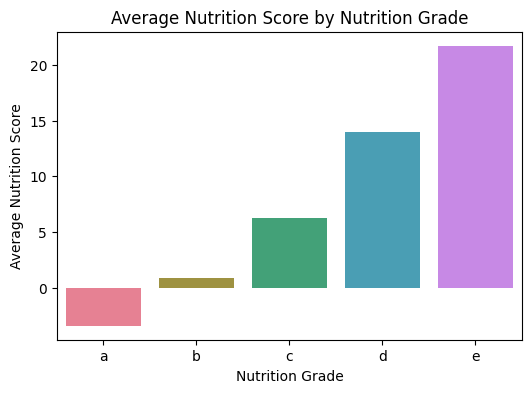

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(data=nutrition_grade_aggregates.drop("count", axis=1), x='nutrition_grade', y='average_nutrition_score', palette='husl')

# Set title and axis labels
plt.title('Average Nutrition Score by Nutrition Grade')
plt.xlabel('Nutrition Grade')
plt.ylabel('Average Nutrition Score')

plt.show()

**Conclusion**

From the chart above we can see that the lower nutrition scores have a higher nutrition grade. In other words, Grade A tends to have lowest average nutrition scores, while Grade E tends to have highest average nutrition scores.

#### (g) Average Nurition Score Comparision Between Organic vs Non-Organic Foods

Firstly, we need to judge whether a food product is organic or not. After roughly reviewing data, we find that 3 columns may contain information whether the food is organic - product_name, ingredients_text, additives.

We create a column "organic" - 1 if any of these three columns contain text "organic" otherwise 0.

We continue to use df_foodfacts_nutri (drop the rows without nutrition scores)

In [ ]:
# Convert all relevant columns to string type
df_foodfacts_nutri['product_name'] = df_foodfacts_nutri['product_name'].astype(str)
df_foodfacts_nutri['ingredients_text'] = df_foodfacts_nutri['ingredients_text'].astype(str)
df_foodfacts_nutri['additives_en'] = df_foodfacts_nutri['additives_en'].astype(str)

# Check if the word 'organic' appears in any of the three columns
df_foodfacts_nutri['organic'] = df_foodfacts_nutri.apply(lambda x: 1 if 'organic' in x['product_name'].lower() or
                                                     'organic' in x['ingredients_text'].lower() or
                                                     'organic' in x['additives_en'].lower()
                                                else 0, axis=1)

# Group by 'countries_en' and calculate count and mean for 'nutrition-score-fr_100g'
organic_aggregates = df_foodfacts_nutri.groupby('organic').agg(
    count=('organic', 'count'),
    average_nutrition_score=('nutrition-score-fr_100g', 'mean')
).reset_index()

print(organic_aggregates)

<ipython-input-34-0aaa7b154d23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foodfacts_nutri['product_name'] = df_foodfacts_nutri['product_name'].astype(str)
<ipython-input-34-0aaa7b154d23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foodfacts_nutri['ingredients_text'] = df_foodfacts_nutri['ingredients_text'].astype(str)
<ipython-input-34-0aaa7b154d23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

   organic   count  average_nutrition_score
0        0  238274                 9.396774
1        1   16582                 5.852008


<ipython-input-34-0aaa7b154d23>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foodfacts_nutri['organic'] = df_foodfacts_nutri.apply(lambda x: 1 if 'organic' in x['product_name'].lower() or


**Conclusion**

Based upon our analysis, the average nutrition score of organic food is 5.85, comparing to the average nutrition score of non-organic food is 9.40. It also demonstrates that organic food tends to be healthier food options with lower nutrition scores, and that non-organic food usually have higher nutrition scores.

##### Comparision of Nutrition Score for Organic vs Non-Organic Food in Top 10 Category

In [ ]:
organic_aggregates_by_cate = df_foodfacts_nutri[df_foodfacts_nutri['main_category_en'].isin(list(main_category_series.index[:10]))].groupby(['organic', 'main_category_en']).agg(
    count=('organic', 'count'),
    average_nutrition_score=('nutrition-score-fr_100g', 'mean')
).reset_index()

print(organic_aggregates_by_cate)

    organic                 main_category_en  count  average_nutrition_score
0         0                        Beverages   7141                 9.927881
1         0                          Dairies   6442                 7.090345
2         0                      Fresh foods   2982                 8.154259
3         0                        Groceries   3817                10.549384
4         0                            Meals   2617                 3.536110
5         0                            Meats   3945                12.360456
6         0  Plant-based foods and beverages  17379                 1.940273
7         0                     Salty snacks   2125                13.100706
8         0                          Spreads   1643                16.236153
9         0                    Sugary snacks  10649                18.352709
10        1                        Beverages     75                 7.293333
11        1                          Dairies     59                 2.847458

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(data=organic_aggregates_by_cate.drop("count", axis=1), x='main_category_en', y='average_nutrition_score', hue='organic', palette='husl')

# Set title and axis labels
plt.title('Comparision of Nutrition Score for Organic vs Non-Organic Food in Top 10 Category')
plt.xlabel('Food Category')
plt.ylabel('Average Nutrition Score')

plt.show()

####(h) Distribution of nutrient scores

Distributions of Nutrition Score

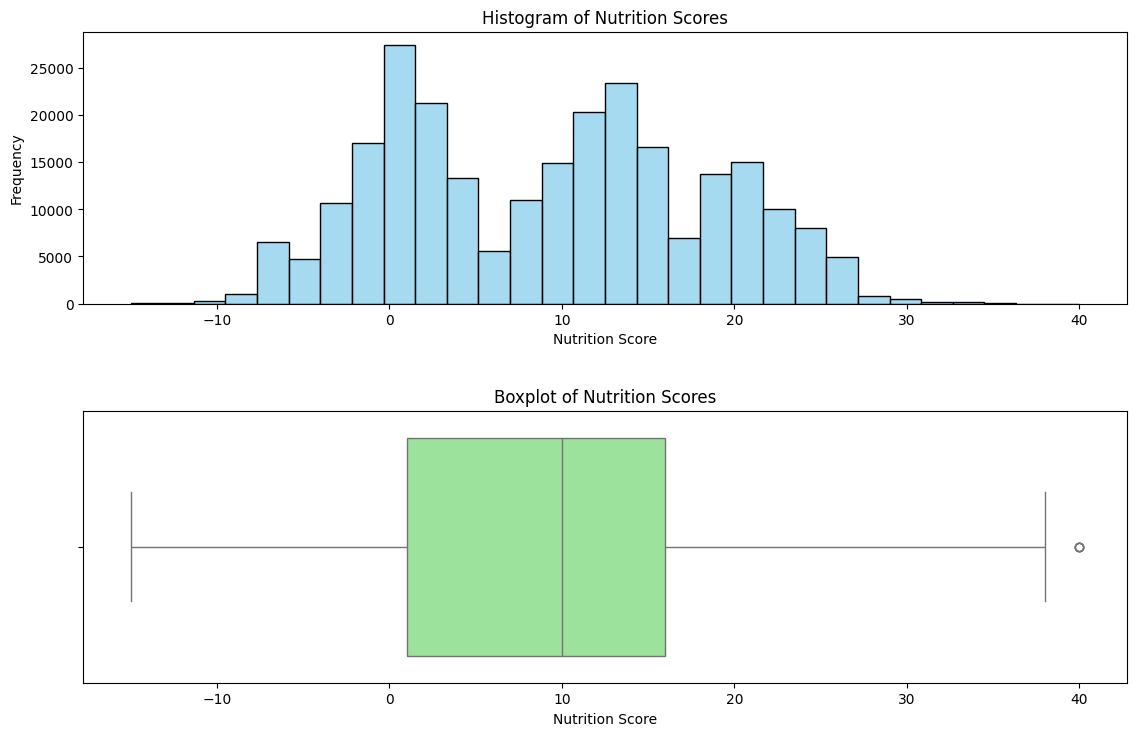

In [ ]:
# Drop NA values from the new combined column for accurate visualization
data = df_foodfacts_cleaned['nutrition-score-fr_100g'].dropna()

# Setting up the figure
plt.figure(figsize=(12, 8))

# Create a subplot grid with 2 rows, 1 for each type of plot
plt.subplot(2, 1, 1)
# Plotting the histogram
sns.histplot(data, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Nutrition Scores')
plt.xlabel('Nutrition Score')
plt.ylabel('Frequency')

# Adding a subplot for the boxplot
plt.subplot(2, 1, 2)
# Plotting the boxplot
sns.boxplot(x=data, color='lightgreen')
plt.title('Boxplot of Nutrition Scores')
plt.xlabel('Nutrition Score')

# Adding space between the subplots for clarity
plt.tight_layout(pad=3.0)

plt.show()

**Conclusion**

Nutrition scores range from below 0 to above 40, but most scores fall between 0 and 30. The highest bars in the histogram suggest the most common range of nutrition scores is around 10 to 15.

## **2.2** Correlation of Feature Variables

#### (a) Isolating Numerics from Categorical Features

Before anything else, it may help to create groups of the numeric and categorical variables.

We want to split the `df_foodfacts_nutri` dataframe into 2 dataframes:

1. `numerics_df`: This dataframe contains all numerical columns from `df_foodfacts_nutri`

2. `categorical_df`: This dataframe contains all categorical columns from `df_foodfacts_nutri`
  - i.e. the columns of non-numeric type or contain boolean values

In [ ]:
# Visualize number of unique values and datatype in each column (call .nunique())
df_foodfacts_nutri.nunique()

product_name                               187274
packaging_tags                              10706
brands_tags                                 41176
categories_en                               17141
countries_en                                  562
ingredients_text                           198478
serving_size                                23424
additives_en                                34402
ingredients_from_palm_oil_n                     3
ingredients_that_may_be_from_palm_oil_n         7
nutrition_grade_fr                              5
pnns_groups_1                                  14
pnns_groups_2                                  41
states_en                                     535
main_category_en                             2147
energy_100g                                  3797
fat_100g                                     3408
saturated-fat_100g                           2269
trans-fat_100g                                426
cholesterol_100g                              505


In [ ]:
# show foodfacts data types
df_foodfacts_nutri.dtypes

product_name                                object
packaging_tags                              object
brands_tags                                 object
categories_en                               object
countries_en                                object
ingredients_text                            object
serving_size                                object
additives_en                                object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
states_en                                   object
main_category_en                            object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
trans-fat_100g                             float64
cholesterol_100g               

We need to reduce the number of numeric columns. We may remove the columns that have less than 10,000 rows with valid data.

In [ ]:
# Calculate the number of non-null values in each column
nonnull_counts = df_foodfacts_nutri.notnull().sum()

# Identify columns where the number of non-nulls is less than or equal to 10,000
columns_to_drop = nonnull_counts[nonnull_counts <= 10000].index

# Drop these columns from the DataFrame
df_foodfacts_clean = df_foodfacts_nutri.drop(columns=columns_to_drop)

print(df_foodfacts_clean.shape)

(254856, 32)


In [ ]:
# select the colums where the datatype is float64
numerics_df = df_foodfacts_clean.select_dtypes(include=['float64'])
numerics_df.head()

numerics_columns = list(numerics_df.columns)

# Print the columns of the new DataFrame to verify the types
print("Numerical columns:", numerics_df.columns)

Numerical columns: Index(['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')


Next, we select categorical columns and exclude irrelevant columns.

In [ ]:
# Select columns that are not float64
categorical_df_orig = df_foodfacts_clean.select_dtypes(exclude=['float64'])

# Print the columns of the new DataFrame to verify the types
print("Categorical columns:", categorical_df_orig.columns)

Categorical columns: Index(['product_name', 'packaging_tags', 'brands_tags', 'categories_en',
       'countries_en', 'ingredients_text', 'serving_size', 'additives_en',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states_en',
       'main_category_en', 'organic'],
      dtype='object')


Based upon reviewing catogrical columns, we only keep 'packaging_tags', 'brands_tags', 'categories_en',
       'countries_en', 'serving_size', 'additives_en',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states_en',
       'main_category_en', 'organic'.

In [ ]:
# Select columns that are not of numeric types (removed description columns like product_name and ingredients_text)
categorical_df = categorical_df_orig[['packaging_tags', 'brands_tags', 'categories_en',
       'countries_en', 'serving_size', 'additives_en',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states_en',
       'main_category_en', 'organic']]

# Print the columns of the new DataFrame to verify the types
categorical_df.nunique()

packaging_tags        10706
brands_tags           41176
categories_en         17141
countries_en            562
serving_size          23424
additives_en          34402
nutrition_grade_fr        5
pnns_groups_1            14
pnns_groups_2            41
states_en               535
main_category_en       2147
organic                   2
dtype: int64

According to the number of unique values and our basic knowledge on food, for future analysis on nutrition score and categories, we will include the following categorical columns:
- 'countries_en', 'nutrition_grade_fr', 'pnns_groups_1' 'pnns_groups_2', 'organic'

In [ ]:
categorical_df_final = categorical_df[['countries_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2','organic']]
categorical_columns = ['countries_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2','organic']


#### (b) **Correlation Heatmap**

Create a correlation matrix using `numerics_df` and call it `corr_mat`. Using the correlation matrix, generate a correlation heatmap for these numeric features. We will be using Seaborn library to create this heatmap.

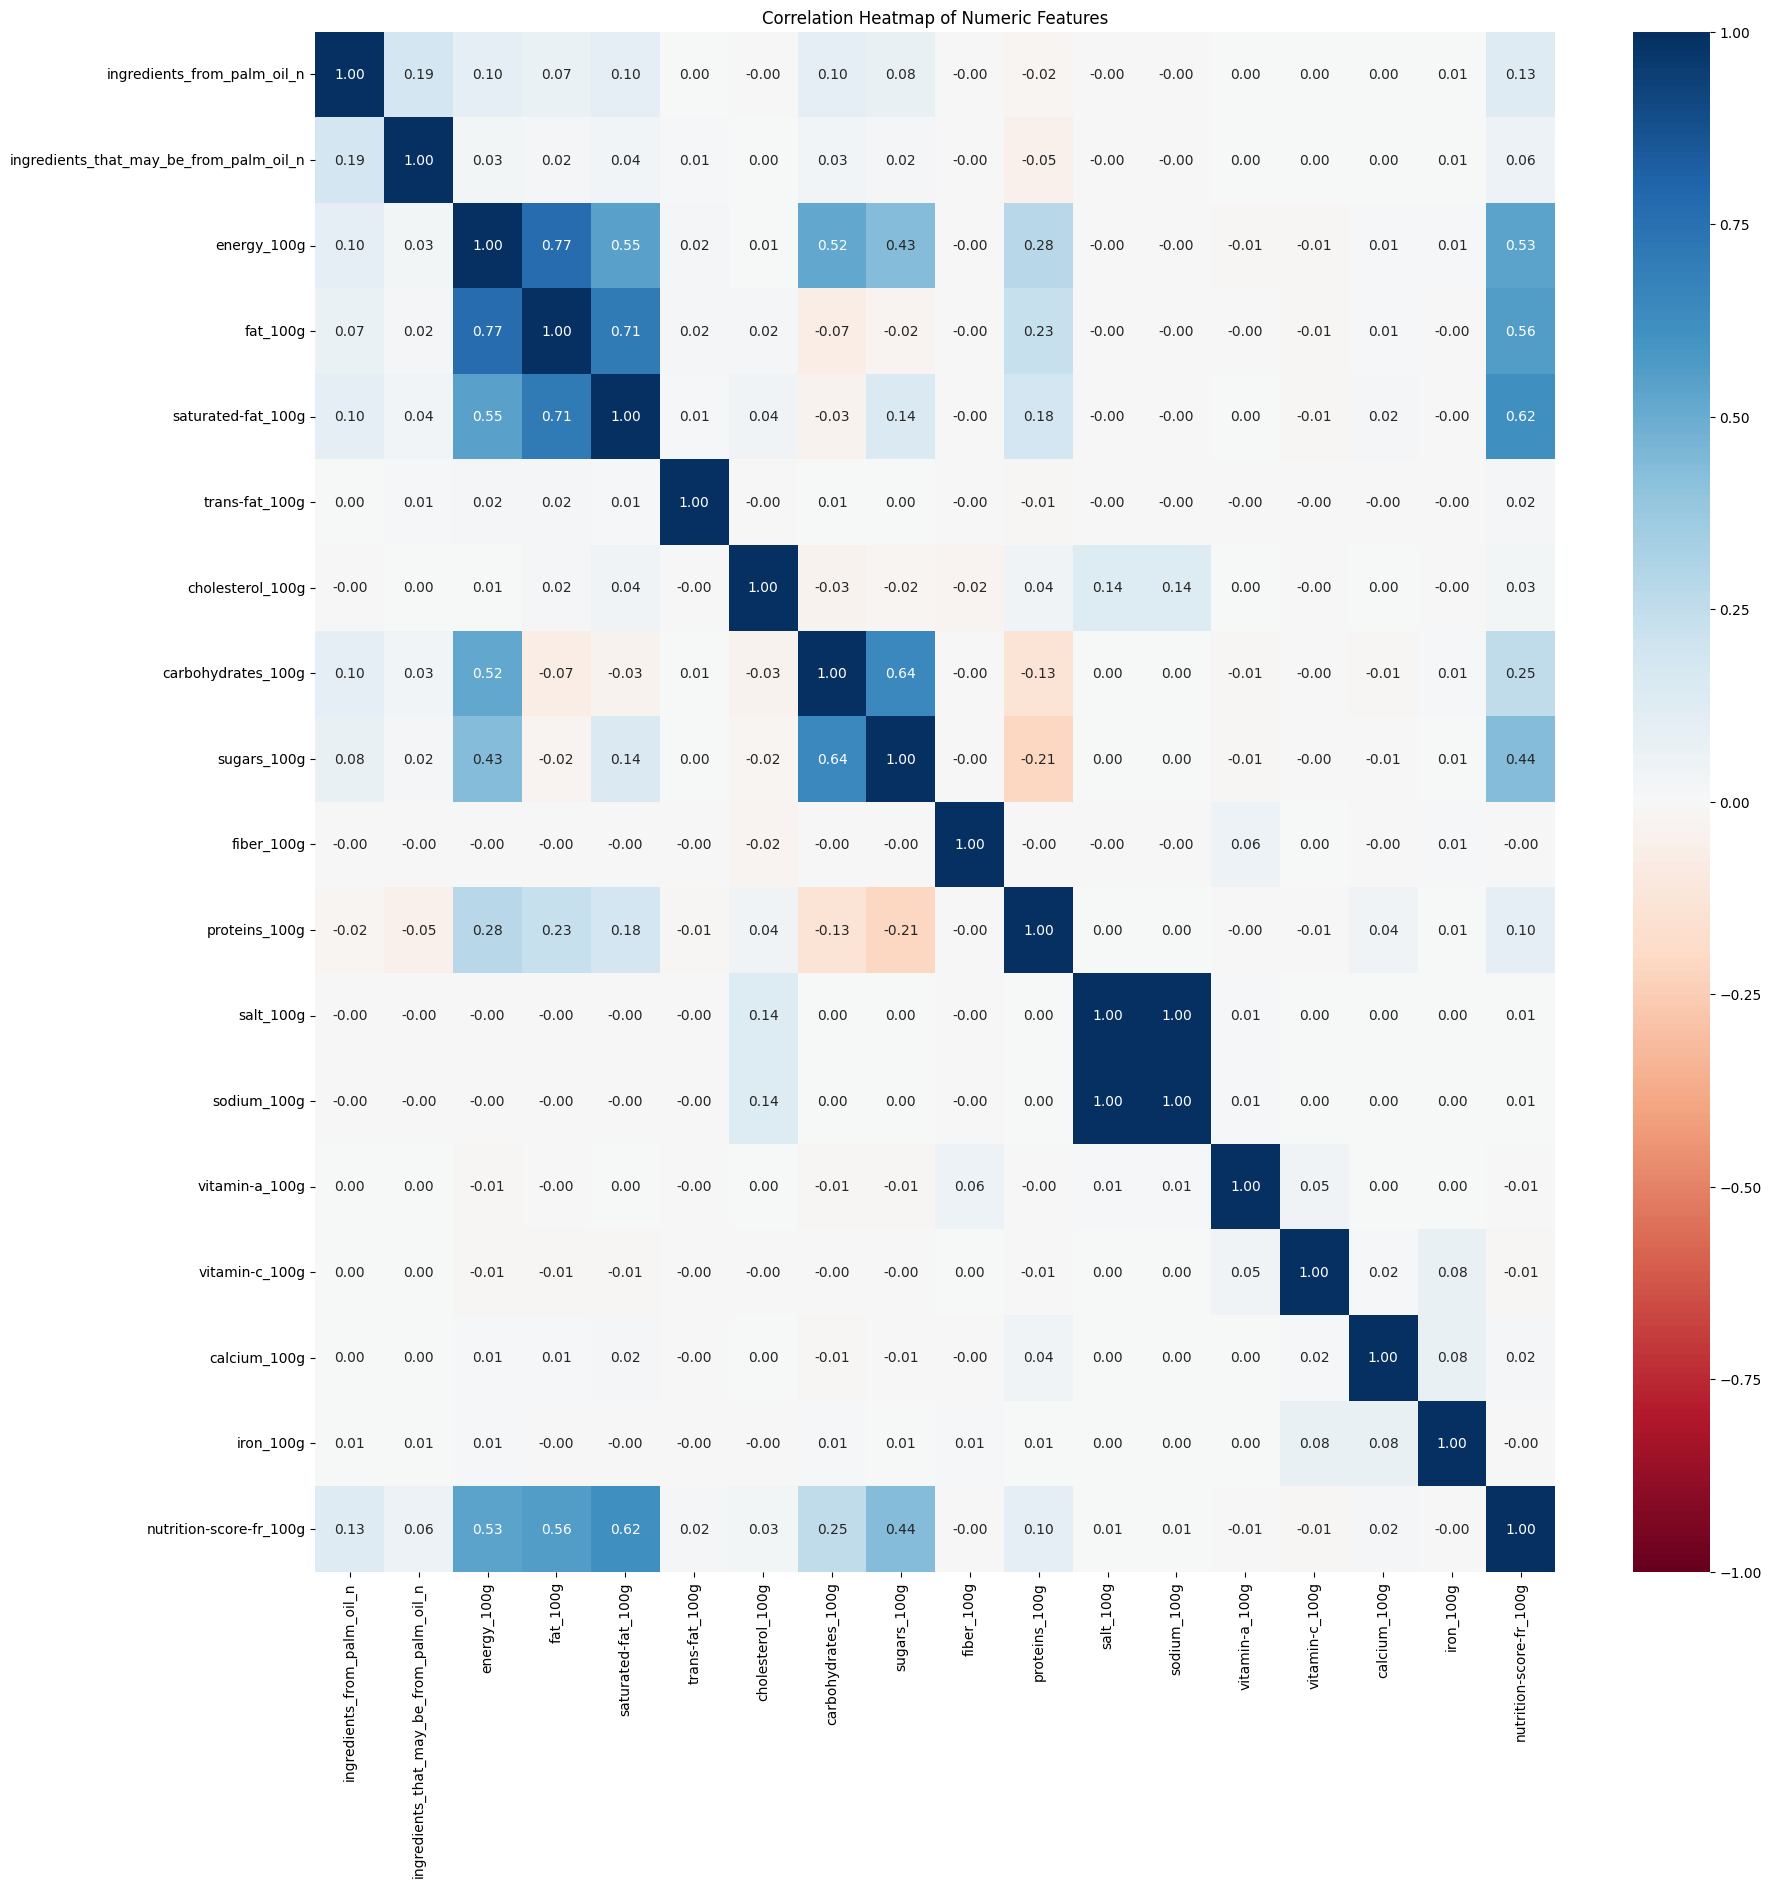

In [ ]:
# create a correlation matrix
corr_mat = numerics_df.corr()
# Set figure size
plt.figure(figsize=(20, 20))
# create heatmap
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="RdBu", center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The Correlation Heatmap illustrates that the following columns are highly correlated:
- 'salt_100g', 'sodium_100g'

Therefore, we could remove 'salt_100g'.

In [ ]:
numerics_df_final = numerics_df.drop(columns = [ 'salt_100g'])

# Print the columns of the new DataFrame
print("Numerical columns:", numerics_df_final.columns)
numerics_columns = list(numerics_df_final.columns)

Numerical columns: Index(['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')


## **2.3** Feature Engineering

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. For nutrition score predition, need to select the right features from EDA & drop unrelated ones.

### **2.3.1** One Hot Encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. With one-hot encoding, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [ ]:
# combining numeric and categorical columns
df_foodfacts_final = df_foodfacts_clean[numerics_columns + categorical_columns]
# df_foodfacts_final = df_foodfacts_clean[categorical_columns+['nutrition-score-fr_100g']]
print(df_foodfacts_clean.shape)

(254856, 32)


In [ ]:
# TO-DO: create dataframe 'encoded_df_foodfacts' that contains the appropriate one hot encoded columns
encoded_df_foodfacts = pd.get_dummies(df_foodfacts_final[['countries_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'organic']])
df_foodfacts_rest = df_foodfacts_final.drop(columns = ['countries_en', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2','organic'])
encoded_df_foodfacts = pd.concat([df_foodfacts_rest,encoded_df_foodfacts], axis = 1)

In [ ]:
# CHECK: display the first 5 rows of 'encoded_df_foodfacts'
encoded_df_foodfacts.head()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,pnns_groups_2_Sweets,pnns_groups_2_Tripe dishes,pnns_groups_2_Vegetables,pnns_groups_2_cereals,pnns_groups_2_fruits,pnns_groups_2_legumes,pnns_groups_2_nuts,pnns_groups_2_pastries,pnns_groups_2_unknown,pnns_groups_2_vegetables
1,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,...,False,False,False,False,False,False,False,False,False,False
7,0.0,0.0,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,...,False,False,False,False,False,False,False,False,False,False
12,0.0,0.0,2230.0,36.67,5.00,NaN,NaN,36.67,3.33,6.7,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Downstampling to 60000 to optimize compute usage
encoded_df_foodfacts = encoded_df_foodfacts.sample(n=60000)

# **Part III:** Regression Models

## **3.0.0** Preprocessing: Create Features and Label and Split Data into Train and Test
The features will be all the variables in the dataset **except** `"nutrition-score-fr_100g"`, which will act as the label for our model. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.


In [ ]:
features = encoded_df_foodfacts.drop(columns = 'nutrition-score-fr_100g')
target = encoded_df_foodfacts['nutrition-score-fr_100g']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = seed)

In [ ]:
# # Value Inmputation using KNN
# from sklearn.impute import KNNImputer
# imp = KNNImputer(n_neighbors=2)
# imp.fit(X_train)
# X_train_imp = imp.transform(X_train)
# X_test_imp = imp.transform(X_test)

In [ ]:
# Value Inmputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)

## **3.0.1** PCA for regression


As a first step, we instantiate the `PCA` class from scikit-learn and fit it on the training set. The purpose of using PCA is to remove multicollinearity and prevent overfitting.

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Intermediate step to address fac that PCA is not scale-invariant

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_imp)
X_test_scl = scaler.transform(X_test_imp)

# Instantiate PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scl)

#### **3.0.1.1** Cumulative Explained Variance Ratios



Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"

explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)
print(cum_evr)

[1.25553406e-02 1.01446831e-02 8.61633702e-03 7.74921115e-03
 7.43209496e-03 7.12392985e-03 7.02553931e-03 6.94442047e-03
 6.85883834e-03 6.75987368e-03 6.72805549e-03 6.69638612e-03
 6.55850229e-03 6.53616384e-03 6.00455474e-03 5.02888112e-03
 4.50256399e-03 4.38504019e-03 4.30261927e-03 4.11716718e-03
 4.06693997e-03 3.90211834e-03 3.86486474e-03 3.84482263e-03
 3.80977586e-03 3.75423101e-03 3.74278134e-03 3.73292645e-03
 3.69470669e-03 3.65549356e-03 3.64325634e-03 3.62910048e-03
 3.60599604e-03 3.59442665e-03 3.58489183e-03 3.56565117e-03
 3.56104572e-03 3.55299331e-03 3.51506103e-03 3.51060732e-03
 3.49902229e-03 3.47145547e-03 3.45226306e-03 3.43203692e-03
 3.41897913e-03 3.40684232e-03 3.39456665e-03 3.36625855e-03
 3.36145936e-03 3.35475251e-03 3.34535458e-03 3.32242276e-03
 3.31001348e-03 3.28583927e-03 3.28358417e-03 3.27888843e-03
 3.27646783e-03 3.27450565e-03 3.27437495e-03 3.27281141e-03
 3.27226171e-03 3.27159190e-03 3.27144689e-03 3.27091382e-03
 3.27073757e-03 3.270300

Now plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components we should keep. Also add a horizontal line that represents the 80% of the variance as a threshold.

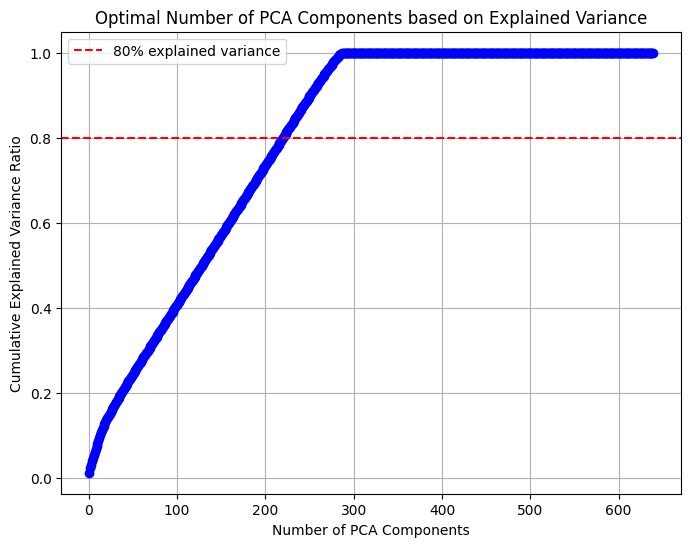

In [ ]:
# Assuming 'cum_evr' is a predefined list with cumulative explained variance ratios
components = list(range(1, len(cum_evr) + 1))  # Components from 1 to the number of items in cum_evr
plt.figure(figsize=(8, 6))
plt.plot(components, cum_evr, marker='o', linestyle='-', color='b', linewidth=1)  # Set linewidth to 1 for a thinner line

# Add a horizontal line at y=0.8 for the 80% threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')

# Add labels, title, and grid
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Optimal Number of PCA Components based on Explained Variance')
plt.grid(True)
plt.legend()

# Display the optimized plot
plt.show()

#### **3.0.1.2** Final PCA

We then use the results above to help decide the number of components to keep, choose a number (`n`) that explains **at least 80% of total variance** in the dataset. Then re-fit and transform PCA on the training set using the number of components we decided.

In [ ]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n
n = sum(cum_evr < 0.80) + 1
pca_optimal = PCA(n_components = n)
X_train_pca = pca_optimal.fit_transform(X_train_scl)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca_optimal.transform(X_test_scl)
print(n)

221


## 3.1 Linear Regression

First of all, we use a Linear Regression model to the PCA-transformed training data, to predict outcomes for the PCA-transformed test data, and calculates the mean squared error (MSE) and R-squared (R2) metrics to evaluate the model's performance in terms of error magnitude and the proportion of variance explained by the model, respectively.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the PCA-transformed training data
linear_reg.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_linear = linear_reg.predict(X_test_pca)

# Manually enforcing predictions within range [-15,40] by setting any values below -15 to -15 and any values above 40 to 40
for i in range(0,len(y_pred_linear)):
  if y_pred_linear[i]<-15:
    y_pred_linear[i]=-15
  if y_pred_linear[i]>40:
    y_pred_linear[i]=40
  i+=1


# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


print("Linear Regression MSE:", mse_linear)
print("Linear Regression R2 Score:", r2_linear)

Linear Regression MSE: 12.319734070555775
Linear Regression R2 Score: 0.8487330038211666


## 3.2 Ridge Regression

As a second step, we wet up and train a Ridge Regression (L2) model with regularization to prevent overfitting, then evaluate its performance using mean squared error and R-squared metrics after making predictions on the PCA-transformed test data. We manually enforce predictions within range [-15,40] by setting any values below -15 to -15 and any values above 40 to 40

In [ ]:
from sklearn.linear_model import Ridge

# Instantiate the Ridge Regression model
ridge_reg = Ridge(alpha=10)

# Fit the model
ridge_reg.fit(X_train_pca, y_train)

# Predict
y_pred_ridge = ridge_reg.predict(X_test_pca)

# Manually enforcing predictions within range [-15,40] by setting any values below -15 to -15 and any values above 40 to 40
for i in range(0,len(y_pred_ridge)):
  if y_pred_ridge[i]<-15:
    y_pred_ridge[i]=-15
  if y_pred_ridge[i]>40:
    y_pred_ridge[i]=40
  i+=1

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2 Score:", r2_ridge)

Ridge Regression MSE: 12.320233988561032
Ridge Regression R2 Score: 0.8487268656127801


Linear Regression and Ridge Regression turn out to have similar MSE and R2 Score, which indicates that Ridge Regression doesn't improve the linear regression. Also, given that we have already done StandardScaler and PCA, it could avoid the situation that some features may have very significant parameters.

## 3.3 Random Forest Regression

Thirdly, we initialize and train a Random Forest Regressor model, then uses it to predict outcomes on the PCA-transformed test dataset, subsequently evaluating its accuracy and explanatory power through the mean squared error and R-squared metrics.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf_reg.predict(X_test_pca)

# Manually enforcing predictions within range [-15,40] by setting any values below -15 to -15 and any values above 40 to 40
for i in range(0,len(y_pred_rf)):
  if y_pred_rf[i]<-15:
    y_pred_rf[i]=-15
  if y_pred_rf[i]>40:
    y_pred_rf[i]=40
  i+=1

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression MSE:", mse_rf)
print("Random Forest Regression R2 Score:", r2_rf)

Random Forest Regression MSE: 3.4013772500000004
Random Forest Regression R2 Score: 0.9582364264900638


It shows that Random Forest Regression results in a better model than Linear Regression and Ridge Regression. R2 Score is significantly higher than those with Linear Regression and Ridge Regression.

# **Part IV:** Classification Models - Organic or Not

### 4.0.0 Preprocessing: Create Featuers and Label, Split Data into Train and Test, and Balance Data
The features will be all the variables in the dataset **except** `"organic"`, which will act as the label for our model. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.

As we have seen in (g) of 2.1.2, non-organic class has much more data than organic class. Therefore, we will perform over-sampling on the minority class (organic) to balance data

In [ ]:
pip install -U imbalanced-learn

In [ ]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
encoded_df_foodfacts_2 = encoded_df_foodfacts

features = encoded_df_foodfacts.drop(columns = 'organic')
target = encoded_df_foodfacts['organic']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = seed)

In [ ]:
# Check the number of records before over sampling
print(sorted(Counter(y_train).items()))

[(0, 44904), (1, 3096)]


In [ ]:
# Randomly over sample the minority class in training dataset
ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 44904), (1, 44904)]


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)
X_train_imp = imp.transform(X_train_ros)
X_test_imp = imp.transform(X_test)

### 4.0.1 PCA for Classification

As a first step, we instantiate the `PCA` class from scikit-learn and fit it on the training set. The purpose of using PCA is to remove multicollinearity and prevent overfitting.

In [ ]:
# Intermediate step to address fac that PCA is not scale-invariant

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_imp)
X_test_scl = scaler.transform(X_test_imp)

# Instantiate PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scl)

#### **4.0.1.1** Cumulative Explained Variance Ratios



Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)
print(cum_evr)

[1.44654007e-02 1.11038234e-02 8.00976828e-03 7.57991011e-03
 7.20317724e-03 6.94936015e-03 6.89277832e-03 6.83345797e-03
 6.78215982e-03 6.71484621e-03 6.68583886e-03 6.65858924e-03
 6.55677948e-03 6.53606908e-03 6.22160517e-03 5.52094219e-03
 4.91919850e-03 4.41017044e-03 4.29591280e-03 4.11877712e-03
 4.04084576e-03 3.91370303e-03 3.87718443e-03 3.85639679e-03
 3.81109343e-03 3.77746134e-03 3.75054601e-03 3.73924282e-03
 3.70196121e-03 3.67220317e-03 3.65774409e-03 3.62253327e-03
 3.60748196e-03 3.59903670e-03 3.59479132e-03 3.57183585e-03
 3.55302748e-03 3.53666514e-03 3.53109034e-03 3.51251555e-03
 3.48387973e-03 3.47746503e-03 3.45662230e-03 3.42645455e-03
 3.41967448e-03 3.41077548e-03 3.37172198e-03 3.36540910e-03
 3.34521042e-03 3.32526957e-03 3.31805898e-03 3.30991366e-03
 3.30701829e-03 3.27865655e-03 3.27671676e-03 3.27343182e-03
 3.27279957e-03 3.27208568e-03 3.27082386e-03 3.27073889e-03
 3.27030978e-03 3.26991155e-03 3.26976313e-03 3.26928569e-03
 3.26920938e-03 3.269072

Now plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components we should keep. Also add a horizontal line that represents the 80% of the variance as a threshold.

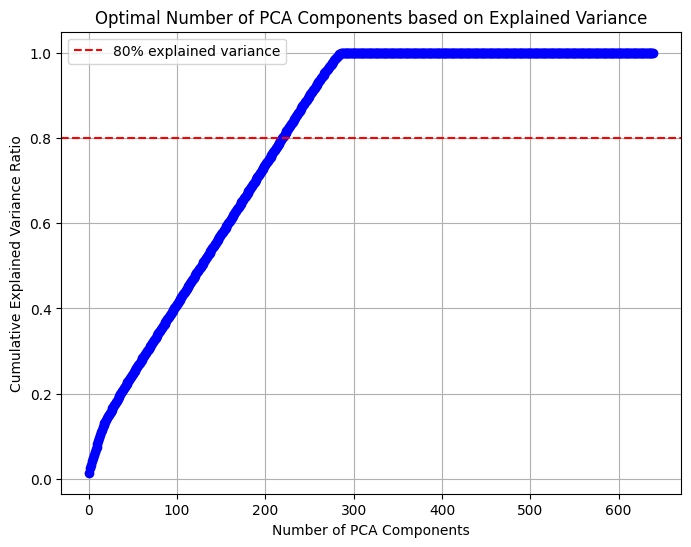

In [ ]:
# Assuming 'cum_evr' is a predefined list with cumulative explained variance ratios
components = list(range(1, len(cum_evr) + 1))  # Components from 1 to the number of items in cum_evr
plt.figure(figsize=(8, 6))
plt.plot(components, cum_evr, marker='o', linestyle='-', color='b', linewidth=1)  # Set linewidth to 1 for a thinner line

# Add a horizontal line at y=0.8 for the 80% threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')

# Add labels, title, and grid
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Optimal Number of PCA Components based on Explained Variance')
plt.grid(True)
plt.legend()

# Display the optimized plot
plt.show()

#### **4.0.1.2** Final PCA

We then use the results above to help decide the number of components to keep, choose a number (`n`) that explains **at least 80% of total variance** in the dataset. Then re-fit and transform PCA on the training set using the number of components we decided.

In [ ]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n
n = sum(cum_evr < 0.80) + 1
pca_optimal = PCA(n_components = n)
X_train_pca = pca_optimal.fit_transform(X_train_scl)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca_optimal.transform(X_test_scl)
print(n)

220


### 4.1 Logistic Regression

First of all, we train a Logistic Regression model on X_train and y_train. We also calculate the accuracy of the model on the test set to evaluate the model performance.

In [ ]:
# Import required libraries
import sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model with default parameters and fit it on the training set
clf = LogisticRegression()
clf.fit(X_train_pca,y_train_ros)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca)

# Find the accuracy and store the value in `log_acc`
log_acc = clf.score(X_test_pca,y_test)
print("Accuracy: %.1f%%"% (log_acc*100))

Accuracy: 66.5%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4.2 Random Forest Classifier

Secondly, we fit a Random Forest Classifier on the X_train and y_train with the following hyperparameters:
- balanced class_weight
- 120 estimators
- maximum depth of 30
- random seed set to 42

We also calculate the accuracy of the model on the test set using the score method.

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize model with default parameters and fit it on the training set
clf = RandomForestClassifier(n_estimators = 120, max_depth=30, random_state=42, class_weight='balanced')
clf.fit(X_train_pca,y_train_ros)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca)

# Find the accuracy and store the value in `rf_acc`
rf_acc = clf.score(X_test_pca,y_test)
print("Accuracy: %.1f%%"% (rf_acc*100))

# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = sklearn.metrics.confusion_matrix(y_test, y_pred)

Accuracy: 92.2%


Random Forest Classifier result in an accuracy score of 92.2%, as compared to 66.5% for Logistic Regression. Therefore, Random Forest Classifier has a better model performance.

##4.3 XGBoost

###4.3.1 XGBoost Model Training


We are training and evaluating an XGBoost classifier to predict product categories using preprocessed food data, and assessing the model's accuracy and effectiveness through various performance metrics.

In [ ]:
!pip install xgboost
!pip install imbalanced-learn

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Train the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scl, y_train_ros)

# Make predictions
y_pred = model.predict(X_test_scl)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8513333333333334
Confusion Matrix:
 [[9672 1528]
 [ 256  544]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.92     11200
           1       0.26      0.68      0.38       800

    accuracy                           0.85     12000
   macro avg       0.62      0.77      0.65     12000
weighted avg       0.93      0.85      0.88     12000



Precision:
1. 0.98 for non-organic products (labeled 0): very high, indicating that the model almost never incorrectly labels organic products as non-organic when predicting non-organic products.
2. For organic products (labeled 1) it is 0.25: relatively low, indicating that the model has only about a 25% chance of being correct when predicting a product as organic.

Recall:
1. 0.86 for non-organic products: indicates that the model finds 86% of non-organic products.
2. 0.70 for organic: Better, meaning the model finds 70% of organic products.

F1-Score:
1. For non-organic products is 0.91: Higher, indicating a better balance of accuracy and recall.
2. For organic products it is 0.36: low, indicating that although the recall is fair, the accuracy is low, affecting the F1-score.

###Conclusion
The overall accuracy is high, mainly due to the very accurate predictions for non-organic products, which make up the majority of the dataset.

# **Part V:** Classification Models - PNNS Group

### 5.0.0 Preprocessing: Create Featuers and Label, Split Data into Train and Test, and Balance Data
The features will be all the variables in the dataset **except** `"pnns_groups_1"`, which will act as the label for our model. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.

In [ ]:
pip install -U imbalanced-learn

In [ ]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

Rebuild data since we have one-hot coded 'pnns_groups_1'. Instead, we restart with df_foodfacts_final and keep 'pnns_groups_1'.

In [ ]:
encoded_df_foodfacts_2 = pd.get_dummies(df_foodfacts_final[['countries_en', 'nutrition_grade_fr', 'pnns_groups_2', 'organic']])
df_foodfacts_rest_2 = df_foodfacts_final.drop(columns = ['countries_en', 'nutrition_grade_fr',  'pnns_groups_2','organic'])
encoded_df_foodfacts_2 = pd.concat([df_foodfacts_rest_2,encoded_df_foodfacts_2], axis = 1)


First of all, we observe the data first.

In [ ]:
print(encoded_df_foodfacts_2['pnns_groups_1'].value_counts().sort_index())

pnns_groups_1
Beverages                   9497
Cereals and potatoes        8345
Composite foods             6780
Fat and sauces              5556
Fish Meat Eggs              6764
Fruits and vegetables       4260
Milk and dairy products     8813
Salty snacks                2865
Sugary snacks              11842
cereals-and-potatoes          17
fruits-and-vegetables        789
salty-snacks                   1
sugary-snacks                517
Name: count, dtype: int64


We should remove unknown and NaN rows. It's meaningless to predict the category is unknown.

In [ ]:
encoded_df_foodfacts_2 = encoded_df_foodfacts_2.dropna(subset=['pnns_groups_1'])
encoded_df_foodfacts_2 = encoded_df_foodfacts_2[encoded_df_foodfacts_2['pnns_groups_1'] != 'unknown']

Then we split data to features and target and split further into training and test set for further operations.

In [ ]:
features = encoded_df_foodfacts_2.drop(columns = 'pnns_groups_1')
target = encoded_df_foodfacts_2['pnns_groups_1']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = seed)

In [ ]:
# Randomly over sample the minority class in training dataset
ros = RandomOverSampler(random_state=101)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

# Check the number of records after over sampling
print((Counter(y_train_ros).items()))

dict_items([('fruits-and-vegetables', 9481), ('Beverages', 9481), ('Milk and dairy products', 9481), ('Fat and sauces', 9481), ('Sugary snacks', 9481), ('Fruits and vegetables', 9481), ('Composite foods', 9481), ('Cereals and potatoes', 9481), ('Fish Meat Eggs', 9481), ('Salty snacks', 9481), ('sugary-snacks', 9481), ('cereals-and-potatoes', 9481), ('salty-snacks', 9481)])


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)
X_train_imp = imp.transform(X_train_ros)
X_test_imp = imp.transform(X_test)

### 5.0.1 PCA for Classification

In [ ]:
# Intermediate step to address fact that PCA is not scale-invariant

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_imp)
X_test_scl = scaler.transform(X_test_imp)

# Instantiate PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scl)

#### **5.0.1.1** Cumulative Explained Variance Ratios



Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"

explained_variance_ratios = pca.explained_variance_ratio_
print(explained_variance_ratios)

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)
print(cum_evr)

[1.16569852e-02 6.00164577e-03 5.38675553e-03 4.33657519e-03
 3.78939504e-03 3.51850898e-03 3.33760902e-03 3.00375873e-03
 2.98258221e-03 2.94502780e-03 2.87587235e-03 2.71471212e-03
 2.70469548e-03 2.65459104e-03 2.59266008e-03 2.54704103e-03
 2.49694125e-03 2.48769209e-03 2.46396056e-03 2.45755957e-03
 2.44426882e-03 2.42819838e-03 2.42074940e-03 2.41942350e-03
 2.40446781e-03 2.40308723e-03 2.38349243e-03 2.35836790e-03
 2.35169273e-03 2.34823660e-03 2.34480243e-03 2.33302919e-03
 2.31620060e-03 2.30543852e-03 2.29433580e-03 2.28274299e-03
 2.27145903e-03 2.26853812e-03 2.25359217e-03 2.24209393e-03
 2.23229907e-03 2.22371838e-03 2.21323511e-03 2.20225122e-03
 2.19993802e-03 2.18203286e-03 2.17435110e-03 2.16578051e-03
 2.15842225e-03 2.15414938e-03 2.15187409e-03 2.14821043e-03
 2.14227155e-03 2.14141138e-03 2.13974885e-03 2.13807722e-03
 2.13787876e-03 2.13769295e-03 2.13706785e-03 2.13685909e-03
 2.13653220e-03 2.13592617e-03 2.13586009e-03 2.13558248e-03
 2.13539717e-03 2.135258

Now plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components we should keep. Also add a horizontal line that represents the 80% of the variance as a threshold.

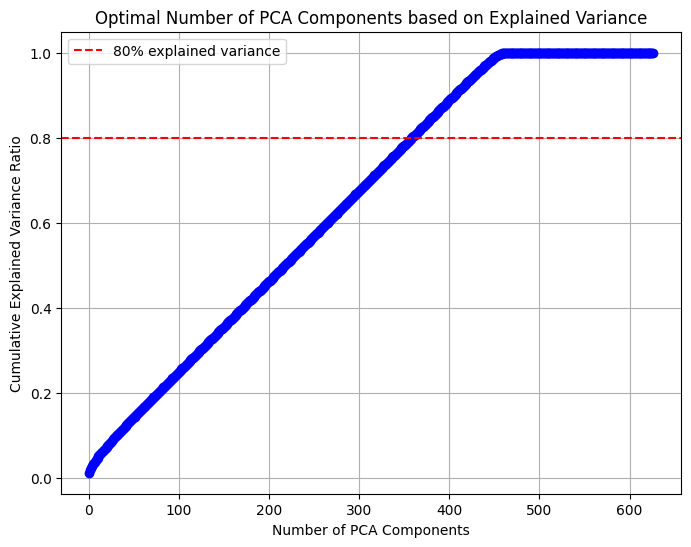

In [ ]:
# Assuming 'cum_evr' is a predefined list with cumulative explained variance ratios
components = list(range(1, len(cum_evr) + 1))  # Components from 1 to the number of items in cum_evr
plt.figure(figsize=(8, 6))
plt.plot(components, cum_evr, marker='o', linestyle='-', color='b', linewidth=1)  # Set linewidth to 1 for a thinner line

# Add a horizontal line at y=0.8 for the 80% threshold
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')

# Add labels, title, and grid
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Optimal Number of PCA Components based on Explained Variance')
plt.grid(True)
plt.legend()

# Display the optimized plot
plt.show()

#### **5.0.1.2** Final PCA

We then use the results above to help decide the number of components to keep, choose a number (`n`) that explains **at least 80% of total variance** in the dataset. Then re-fit and transform PCA on the training set using the number of components we decided.

In [ ]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n
n = sum(cum_evr < 0.80) + 1
pca_optimal = PCA(n_components = n)
X_train_pca = pca_optimal.fit_transform(X_train_scl)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca_optimal.transform(X_test_scl)
print(n)

359


### 5.1 Logistic Regression

First of all, we train a Logistic Regression model on X_train and y_train. We also calculate the accuracy of the model on the test set to evaluate the model performance.

In [ ]:
# Import required libraries
import sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model with default parameters and fit it on the training set
clf = LogisticRegression()
clf.fit(X_train_pca,y_train_ros)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca)

# Find the accuracy and store the value in `log_acc`
log_acc = clf.score(X_test_pca,y_test)
print("Accuracy: %.1f%%"% (log_acc*100))

Accuracy: 99.6%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5.2 Random Forest Classifier

Secondly, we fit a Random Forest Classifier on the X_train and y_train with the following hyperparameters:
- balanced class_weight
- 120 estimators
- maximum depth of 30
- random seed set to 42

We also calculate the accuracy of the model on the test set using the score method.

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize model with default parameters and fit it on the training set
clf = RandomForestClassifier(n_estimators = 120, max_depth=30, random_state=42, class_weight='balanced')
clf.fit(X_train_pca,y_train_ros)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test_pca)

# Find the accuracy and store the value in `rf_acc`
rf_acc = clf.score(X_test_pca,y_test)
print("Accuracy: %.1f%%"% (rf_acc*100))

# TO-DO: Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = sklearn.metrics.confusion_matrix(y_test, y_pred)

Accuracy: 99.0%


From the above analysis, we find that Random Forest Classifier has an accuracy score of 99.0%, which is slightly lower than Logistic Regression.

# **Part VI:** Neural Network Modeling

###6.1 Neural Network for PNNS Group Prediction

###6.1.1 Build the Neural Network Model

Configure a neural network model using TensorFlow and Keras, integrating layers with dropout for regularization, and compiles the model with Adam optimizer and binary crossentropy loss to prepare it for binary classification training and evaluation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Ensure data types are correct
X_train = X_train_imp.astype('float32')

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_ros)
y_train = to_categorical(y_train_encoded)

num_classes = y_train.shape[1]

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_imp.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add early stopping mechanism to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


###6.2.1 Train the Model

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/30
3082/3082 [==============================] - 24s 7ms/step - loss: 2.2281 - accuracy: 0.3264 - val_loss: 4.9387 - val_accuracy: 0.1706
Epoch 2/30
3082/3082 [==============================] - 17s 5ms/step - loss: 0.6019 - accuracy: 0.8239 - val_loss: 4.7529 - val_accuracy: 0.2098
Epoch 3/30
3082/3082 [==============================] - 14s 5ms/step - loss: 0.2728 - accuracy: 0.9207 - val_loss: 4.2511 - val_accuracy: 0.2340
Epoch 4/30
3082/3082 [==============================] - 13s 4ms/step - loss: 0.1984 - accuracy: 0.9421 - val_loss: 3.9850 - val_accuracy: 0.2552
Epoch 5/30
3082/3082 [==============================] - 17s 6ms/step - loss: 0.1836 - accuracy: 0.9461 - val_loss: 5.1077 - val_accuracy: 0.5188
Epoch 6/30
3082/3082 [==============================] - 13s 4ms/step - loss: 0.1510 - accuracy: 0.9551 - val_loss: 3.7109 - val_accuracy: 0.4049
Epoch 7/30
3082/3082 [==============================] - 15s 5ms/step - loss: 0.1335 - accuracy: 0.9601 - val_loss: 4.4795 - val_ac

###6.2.2 Evaluate the Model

In [ ]:
# prepare test data
X_test = X_test_imp.astype('float32')
# y_test_encoded = label_encoder.transform(y_test)
# y_test = to_categorical(y_test_encoded)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

413/413 [==============================] - 3s 7ms/step - loss: 0.0354 - accuracy: 0.9891
Test Loss: 0.0354350209236145
Test Accuracy: 0.9890991449356079


###6.2.3 Visualization

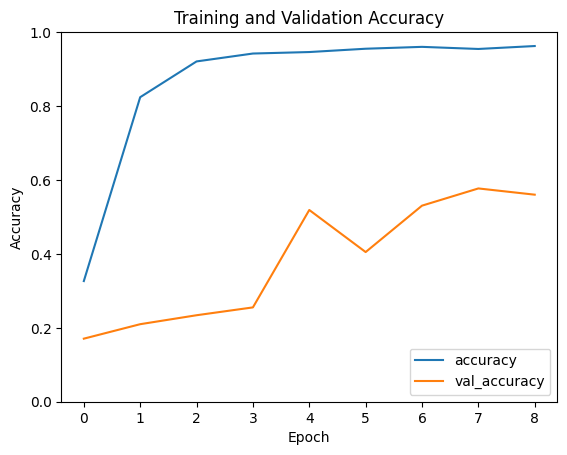

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Show the plot
plt.show()

The key takeaway from this chart is that while the model is performing exceptionally well on the training data, it is not performing nearly as well on the validation data, indicating potential overfitting and a need for model adjustments to improve its generalization.